**1. Importing the dependencies**

In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

**2. Data Loading**

In [36]:
df=pd.read_csv("train.csv")
df

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0


In [22]:
df.shape

(800, 22)

In [30]:
# display all columns of a dataframe
pd.set_option("display.max_columns", None)

In [32]:
# check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [38]:
#convert age column datatype to integer
df['age']=df['age'].astype(int)

In [40]:
for col in df.columns:
    numerical_features= ['ID', 'age', 'result']
    if col not in numerical_features:
        print(col,df[col].unique())
        print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [42]:
df=df.drop(columns=['ID','age_desc'])
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,1,0,0,0,0,0,0,1,1,16,m,Hispanic,no,no,New Zealand,no,12.999501,Self,0
796,0,1,1,0,0,1,0,1,1,1,20,m,White-European,no,no,Cyprus,no,13.561518,Self,0
797,0,0,0,0,0,0,0,0,0,0,5,m,South Asian,yes,no,New Zealand,no,2.653177,Self,0
798,0,0,0,0,0,0,0,0,0,0,16,f,?,no,no,Canada,no,9.069342,Self,0


In [54]:
df.rename(columns={'contry_of_res': 'country_of_residence', 'austim': 'autism'}, inplace=True)

In [62]:
# define the mapping dictionary for country names
mapping= {
    'Viet Nam':'Vietnam',
    'AmericanSamao': 'United States',
    'Hong Kong': 'China'
}
# replace value in the country column
df['country_of_residence']=df['country_of_residence'].replace(mapping)

In [64]:
df['country_of_residence'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China',
       'Angola', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [66]:
# target class distribution
df['Class/ASD'].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

**3. Exploratory Data Analysis**

In [72]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'autism', 'country_of_residence',
       'used_app_before', 'result', 'relation', 'Class/ASD'],
      dtype='object')

In [74]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


**Univariate Analysis**

Numerical Columns:

-age

-result

In [85]:
# set the desired theme
sns.set_theme(style='darkgrid')

Mean: 27.96375
Median: 24.0


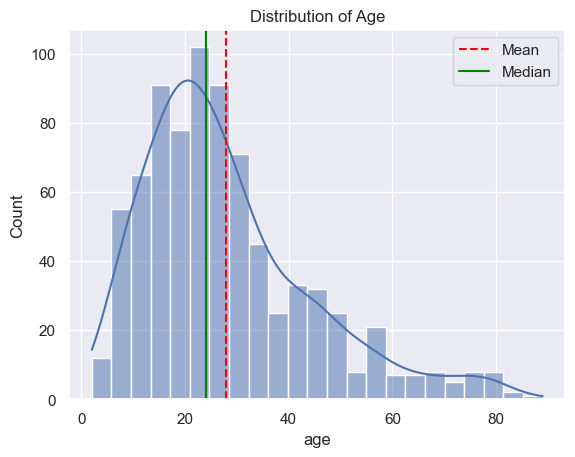

In [93]:
# Histogram for "age"
sns.histplot(df['age'],kde=True)
plt.title('Distribution of Age')

# calculate mean and median
age_mean=df['age'].mean()
age_median=df['age'].median()

print('Mean:', age_mean)
print('Median:', age_median)

plt.axvline(age_mean, color='red', linestyle='--', label='Mean')
plt.axvline(age_median, color='green', linestyle='-', label='Median')

plt.legend()
            
plt.show()

Mean: 8.537303106501248
Median: 9.605299308


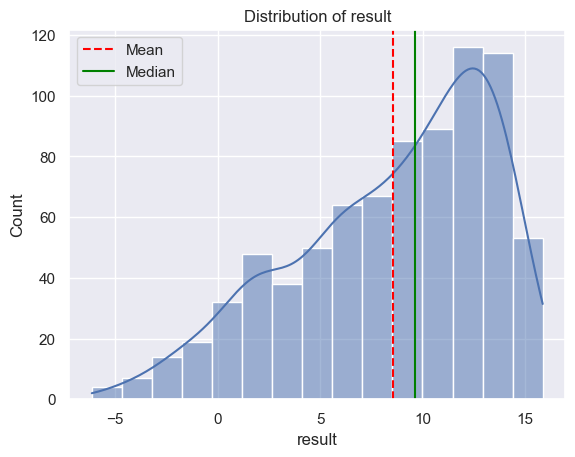

In [99]:
# Histogram for "result"
sns.histplot(df['result'],kde=True)
plt.title('Distribution of result')

# calculate mean and median
result_mean=df['result'].mean()
result_median=df['result'].median()

print('Mean:', result_mean)
print('Median:', result_median)

plt.axvline(result_mean, color='red', linestyle='--', label='Mean')
plt.axvline(result_median, color='green', linestyle='-', label='Median')

plt.legend()
            
plt.show()

**Box Plots for identifying outliers in the numerical columns**

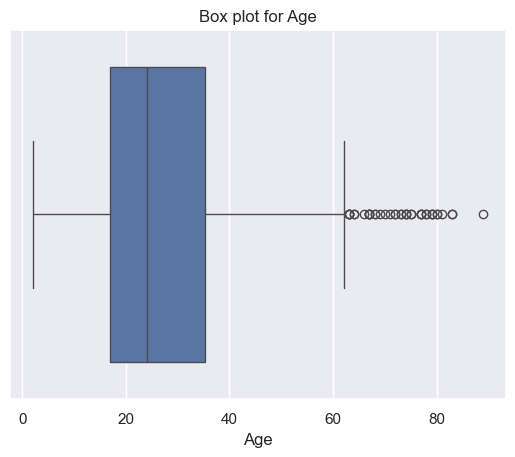

In [102]:
#box plot

sns.boxplot(x=df['age'])
plt.title('Box plot for Age')
plt.xlabel('Age')
plt.show()


In [104]:
# count the outliers using IQR method
Q1= df['age'].quantile(0.25)
Q3= df['age'].quantile(0.75)

IQR= Q3-Q1

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

age_outliers=df[(df['age']<lower_bound) | (df['age']>upper_bound)]

In [106]:
len(age_outliers)

39

In [108]:
# count the outliers using IQR method
Q1= df['result'].quantile(0.25)
Q3= df['result'].quantile(0.75)

IQR= Q3-Q1

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

result_outliers=df[(df['result']<lower_bound) | (df['result']>upper_bound)]

In [110]:
len(result_outliers)

1

**Univariate analysis of Categorical columns**

In [114]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'autism', 'country_of_residence',
       'used_app_before', 'result', 'relation', 'Class/ASD'],
      dtype='object')

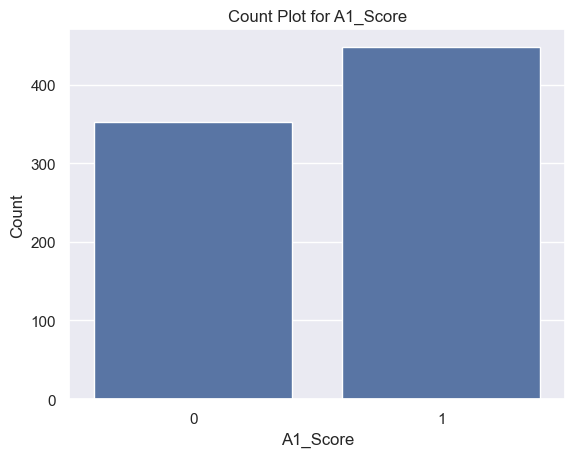

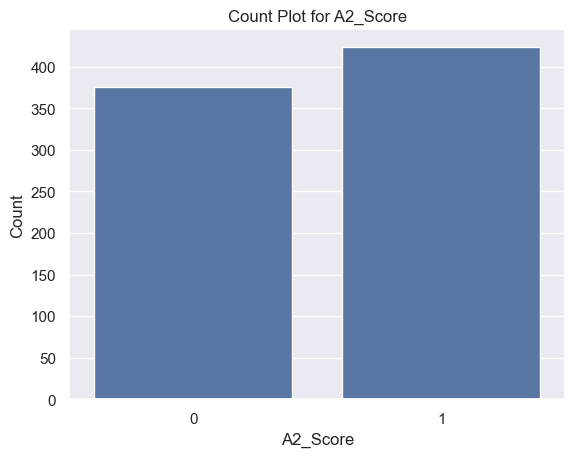

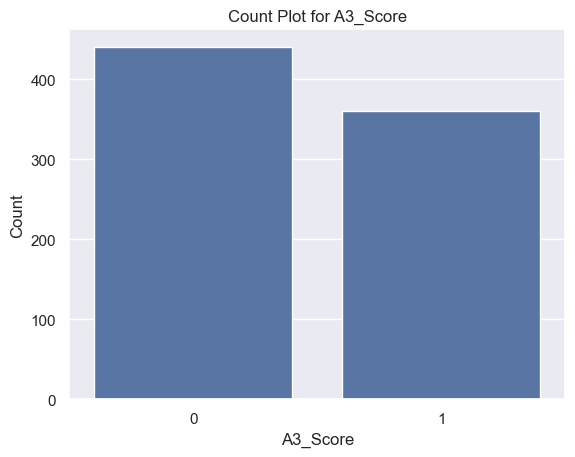

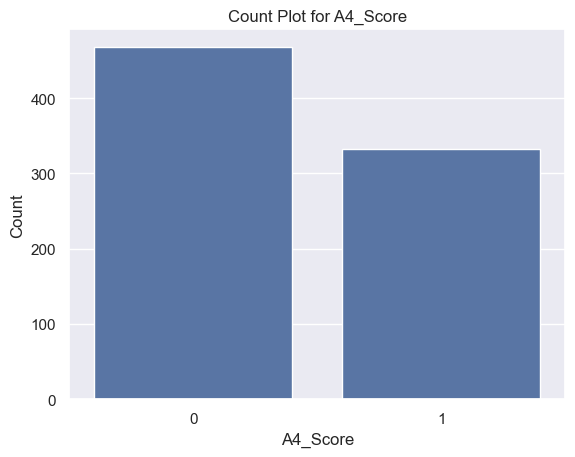

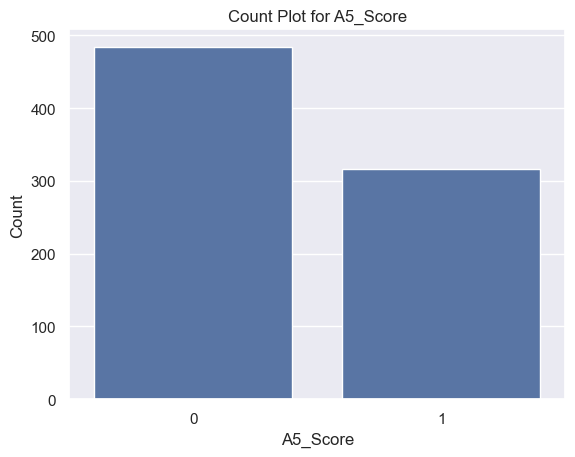

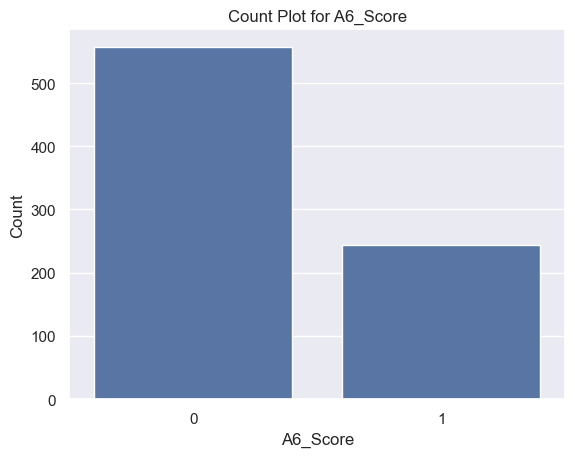

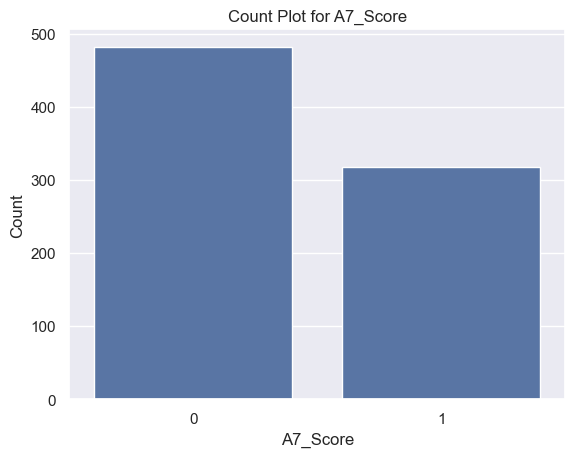

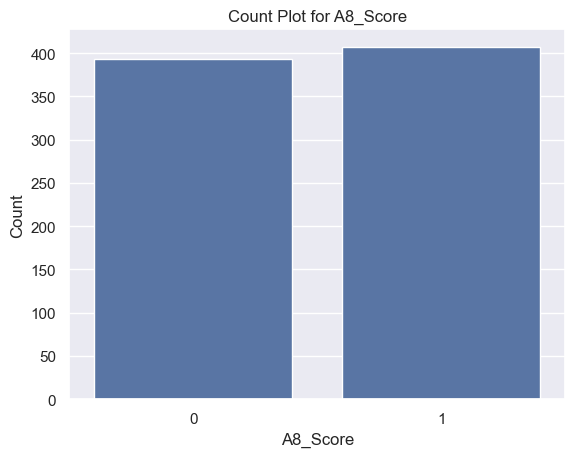

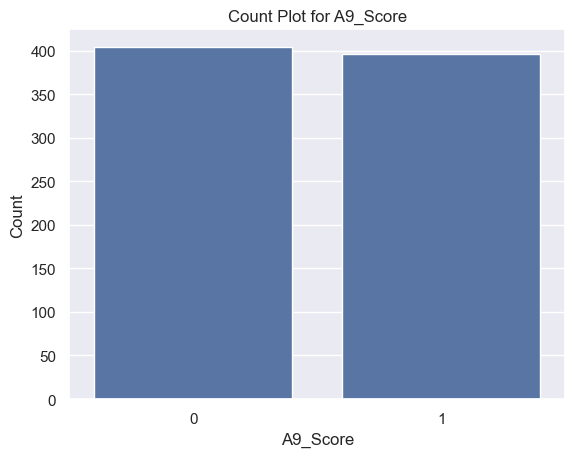

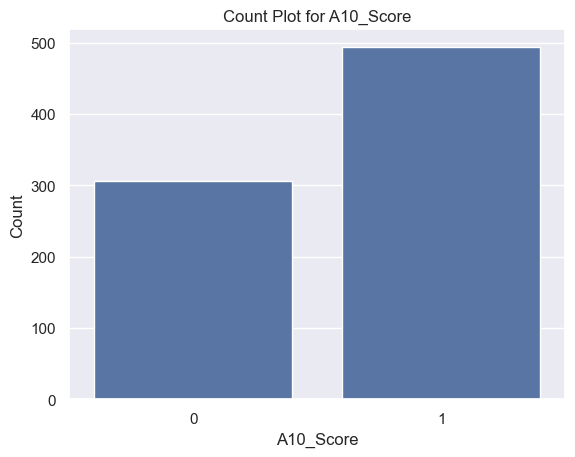

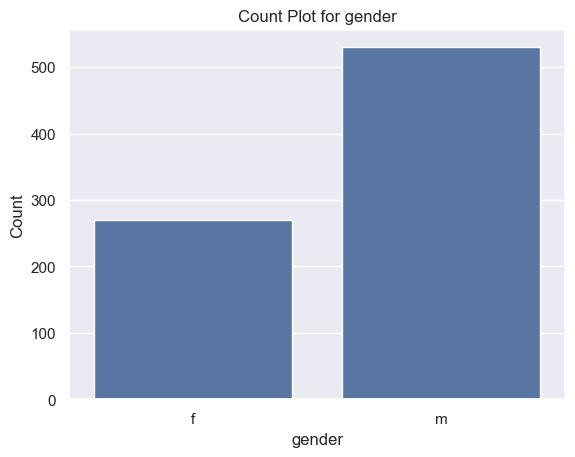

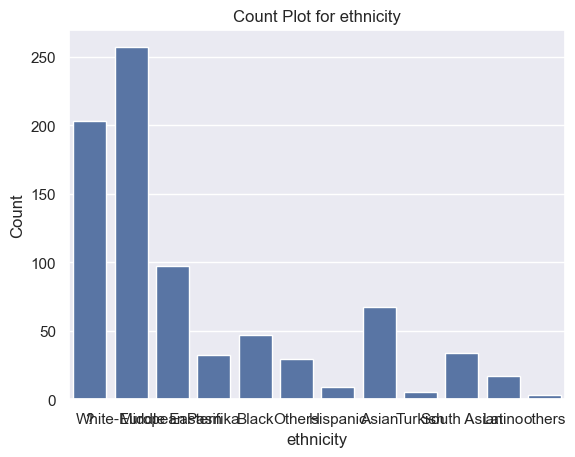

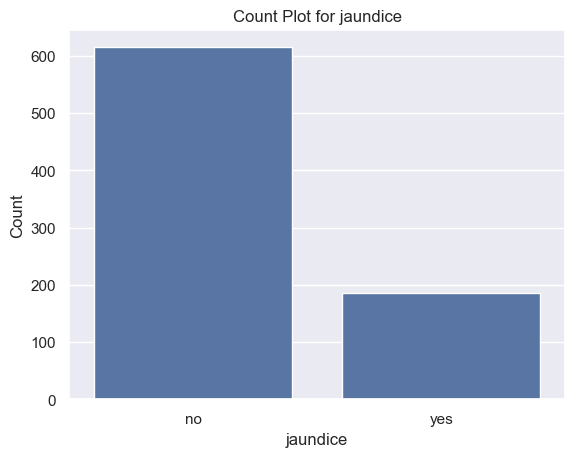

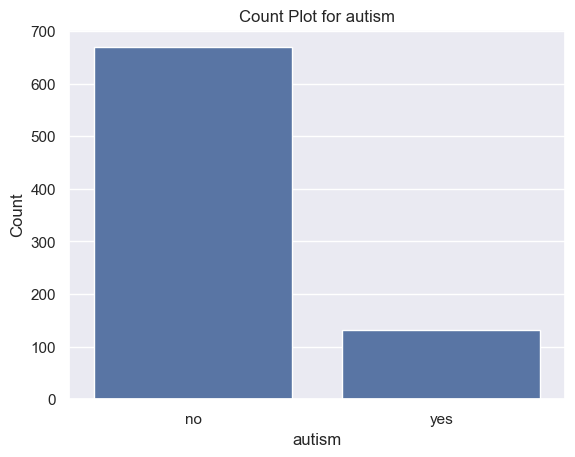

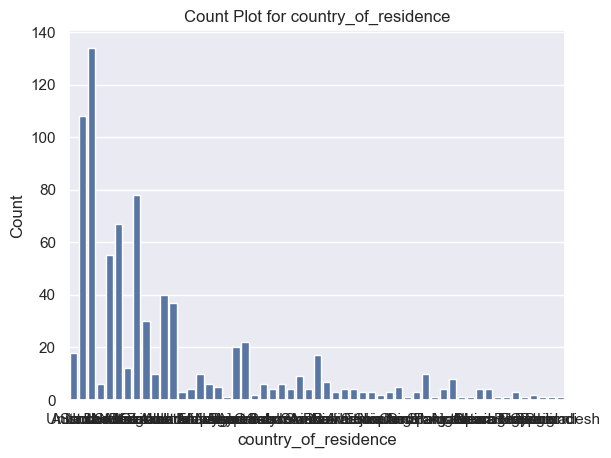

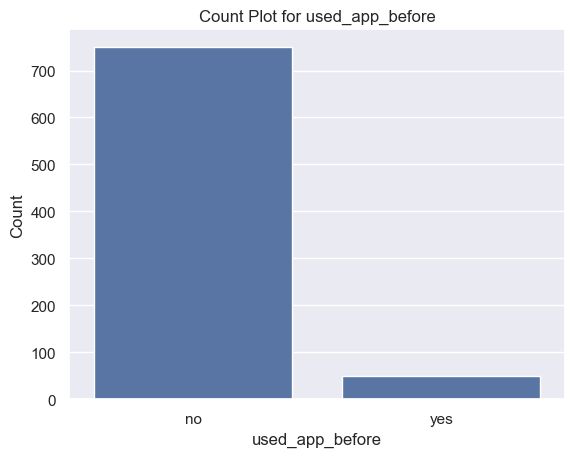

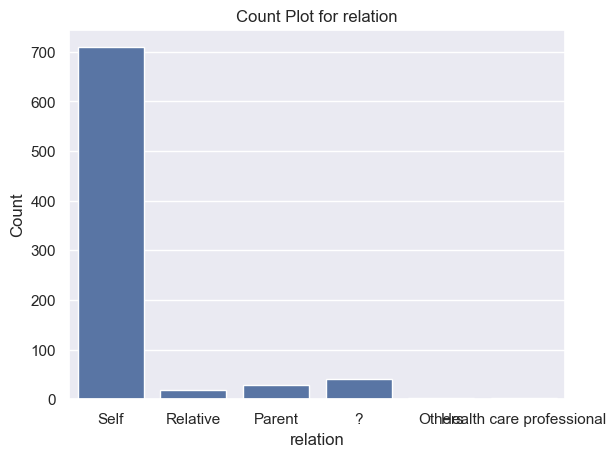

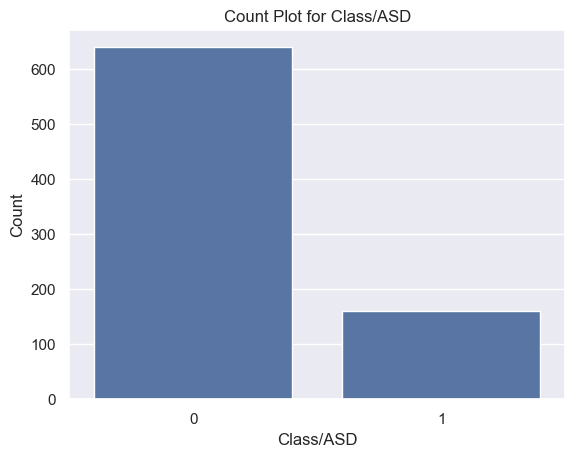

In [130]:
categorical_columns= ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'autism', 'country_of_residence',
       'used_app_before', 'relation','Class/ASD']

for col in categorical_columns:
    sns.countplot(x=df[col])
    plt.title(f"Count Plot for {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [132]:
df['Class/ASD'].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

Handle missing values in ethnicity and relation column

In [135]:
df['ethnicity']= df['ethnicity'].replace({'?':'Others','others':'Others'})

In [137]:
df['ethnicity'].value_counts()

ethnicity
White-European     257
Others             235
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Latino              17
Hispanic             9
Turkish              5
Name: count, dtype: int64

In [145]:
df['relation']= df['relation'].replace({'?':'Others','Parent':'Others',
'Relative':'Others', 'Health care professional':'Others'})

In [147]:
df['relation'].value_counts()

relation
Self      709
Others     91
Name: count, dtype: int64

**Label Encoding**

In [152]:
#identify columns with "object" data type
object_columns=df.select_dtypes(include=["object"]).columns

In [154]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'autism', 'country_of_residence',
       'used_app_before', 'relation'],
      dtype='object')


In [186]:
#initialise a dictionary to store the encoders
encoders={}

#apply label encoding and store the encoders
for column in object_columns:
    label_encoder=LabelEncoder()
    df[column]=label_encoder.fit_transform(df[column])
    encoders[column]=label_encoder

with open("encoders.pkl","wb") as f:
    pickle.dump(encoders,f)

In [188]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'autism': LabelEncoder(),
 'country_of_residence': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [190]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_residence,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,7,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,24,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,53,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,53,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,45,0,-4.777286,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,1,0,0,0,0,0,0,1,1,16.0,1,2,0,0,35,0,12.999501,1,0
796,0,1,1,0,0,1,0,1,1,1,20.0,1,9,0,0,17,0,13.561518,1,0
797,0,0,0,0,0,0,0,0,0,0,5.0,1,7,1,0,35,0,2.653177,1,0
798,0,0,0,0,0,0,0,0,0,0,16.0,0,5,0,0,15,0,9.069342,1,0


**Bivariate analysis**

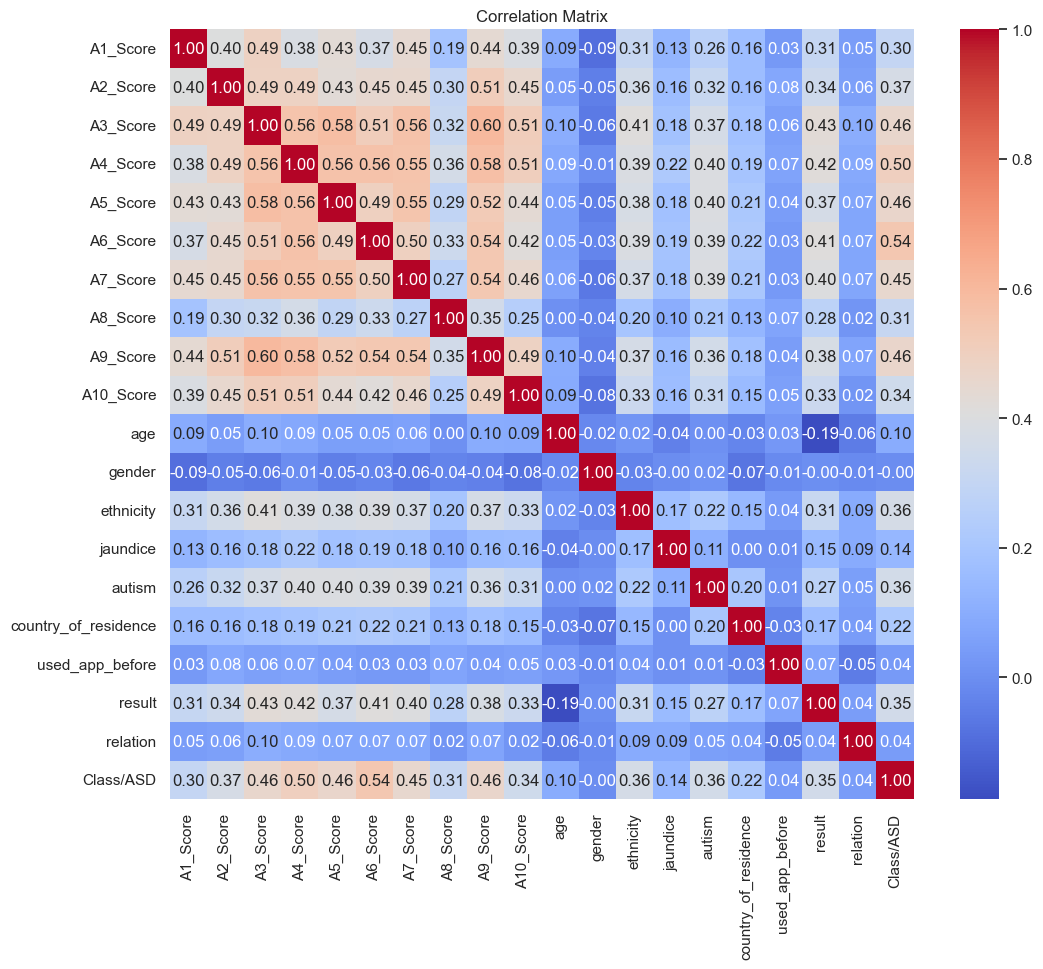

In [193]:
#correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**4. Data Preprocessing**

In [196]:
#function to replace the outliers with mean

def replace_outliers_with_median(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    
     # replace outliers with median value
    median=df[column].median()
    df[column]=df[column].apply(lambda x: median if x<lower_bound or x>upper_bound else x)
    return df
    # replace outliers with median value
    
    
    
    
    

In [198]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_residence,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,7,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,24,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,53,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,53,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,45,0,-4.777286,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,1,0,0,0,0,0,0,1,1,16.0,1,2,0,0,35,0,12.999501,1,0
796,0,1,1,0,0,1,0,1,1,1,20.0,1,9,0,0,17,0,13.561518,1,0
797,0,0,0,0,0,0,0,0,0,0,5.0,1,7,1,0,35,0,2.653177,1,0
798,0,0,0,0,0,0,0,0,0,0,16.0,0,5,0,0,15,0,9.069342,1,0


In [200]:
#replace outliers in the "age" column
df= replace_outliers_with_median(df,"age")
#replace outliers in the "result" column
df= replace_outliers_with_median(df,"result")

**Train test split**

In [211]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'autism', 'country_of_residence',
       'used_app_before', 'result', 'relation', 'Class/ASD'],
      dtype='object')

In [215]:
x=df.drop(columns=['Class/ASD'])
y=df['Class/ASD']

In [217]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [221]:
y_train.value_counts()

Class/ASD
0    515
1    125
Name: count, dtype: int64

**SMOTE** 


In [228]:
#balance y by generating synthetic x values
smote = SMOTE(random_state=42)

In [232]:
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [240]:
y_train_smote.value_counts()

Class/ASD
1    515
0    515
Name: count, dtype: int64

**5. Model Training**

In [243]:
# dictionary of classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [247]:
# dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters...")
  scores = cross_val_score(model, x_train_smote, y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores):.2f}")
  print("-"*50)

Training Decision Tree with default parameters...
Decision Tree Cross-Validation Accuracy: 0.85
--------------------------------------------------
Training Random Forest with default parameters...
Random Forest Cross-Validation Accuracy: 0.92
--------------------------------------------------
Training XGBoost with default parameters...
XGBoost Cross-Validation Accuracy: 0.90
--------------------------------------------------


In [284]:
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost_classifier = XGBClassifier(random_state=42)


In [286]:
# Hyperparameter grids for RandomizedSearchCV

param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30, 50, 70],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


param_grid_rf = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}


param_grid_xgb = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "subsample": [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0]
}


In [288]:
# Perform RandomizedSearchCV
random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt,
                                      n_iter=20, cv=5, scoring="accuracy", random_state=42)

random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf,
                                      n_iter=20, cv=5, scoring="accuracy", random_state=42)

random_search_xgb = RandomizedSearchCV(estimator=xgboost_classifier, param_distributions=param_grid_xgb,
                                       n_iter=20, cv=5, scoring="accuracy", random_state=42)

In [291]:
# fit the models
random_search_dt.fit(x_train_smote, y_train_smote)
random_search_rf.fit(x_train_smote, y_train_smote)
random_search_xgb.fit(x_train_smote, y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [281]:
# Get the model with best score

best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
  best_model = random_search_dt.best_estimator_
  best_score = random_search_dt.best_score_

if random_search_rf.best_score_ > best_score:
  best_model = random_search_rf.best_estimator_
  best_score = random_search_rf.best_score_

if random_search_xgb.best_score_ > best_score:
  best_model = random_search_xgb.best_estimator_
  best_score = random_search_xgb.best_score_



In [293]:
print(f"Best Model: {best_model}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

Best Model: RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=2,
                       n_estimators=500)
Best Cross-Validation Accuracy: 0.92


In [295]:
# save the best model
with open("best_model.pkl", "wb") as f:
  pickle.dump(best_model, f)

**7. Evaluation**

In [299]:
# evaluate on test data
y_test_pred = best_model.predict(x_test)
print("Accuracy score:\n", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy score:
 0.83125
Confusion Matrix:
 [[108  16]
 [ 11  25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       124
           1       0.61      0.69      0.65        36

    accuracy                           0.83       160
   macro avg       0.76      0.78      0.77       160
weighted avg       0.84      0.83      0.83       160

